In [1]:
from pyzbar.pyzbar import decode
from PIL import Image
import requests
import io
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#we can generate the qr code online
url="https://chart.googleapis.com/chart?cht=qr&chl=hi%20Tushar&chs=180x180&choe=UTF-8&chld=L|2"
img=Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB")
decode(img)[0].data


b'hi Tushar'

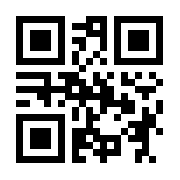

In [3]:
Image.open(io.BytesIO(requests.get(url,stream=True).content)).convert("RGB")

In [4]:
#array convertation
np.array(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
decode(img)[0].type

'QRCODE'

In [6]:
decode(img)[0]

Decoded(data=b'hi Tushar', type='QRCODE', rect=Rect(left=16, top=16, width=147, height=147), polygon=[Point(x=16, y=16), Point(x=16, y=163), Point(x=163, y=163), Point(x=163, y=16)])

In [7]:
decode(img)[0].rect

Rect(left=16, top=16, width=147, height=147)

In [1]:
import cv2 as cv
#import matplotlib.pyplot as plt
from PIL import Image
from pyzbar.pyzbar import decode



def main():
    camera = cv.VideoCapture(0)
    #ret = camera.set(3,120)
    while True:
        _,frame = camera.read()
        frame_g = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        data = decode(Image.fromarray(frame_g))

        for d in data:
            x,y,w,h = d.rect
            cv.rectangle(frame,(x,y),(x+w,y+h),(255,240,90),2)
            tx,ty = cv.getTextSize(str(d.data.decode("utf-8")),cv.FONT_HERSHEY_COMPLEX,fontScale=1.3,thickness=1)[0]
            cv.rectangle(frame,(x,y-ty),(x+tx,y+10),(255,20,90),-1)

            cv.putText(frame,str(d.data.decode("utf-8")),(x,y),cv.FONT_HERSHEY_COMPLEX,0.7,(255,255,255),1,cv.LINE_AA)

        cv.imshow("Scanner",frame)
        key=cv.waitKey(10)
        if key & 0xff == ord('q'):
            cv.destroyAllWindows()
            camera.release()
            break

if __name__ == "__main__":
    main()